# ASR Dataset Quality Evaluation

Manual quality check of 100 randomly sampled transcriptions from the [dataset](https://huggingface.co/datasets/islomov/news_youtube_uzbek_speech_dataset). 
Evaluated Word Error Rate (WER), Character Error Rate (CER), and foreign language contamination.

**Methodology:**
1. Randomly sampled 100 audio files from the dataset
2. Extracted audio from parquet files using sample IDs
3. Manually verified and corrected transcriptions using custom HTML checker tool
4. Computed WER/CER metrics and foreign words count

In [ ]:

import os

import pandas as pd
from tqdm import tqdm  # Progress bar library

from scripts.uzbek_text_normalizer import normalize_uzbek_apostrophes

SEED = 137
DATASET_DIR = "../datasets/feruza-speech"
SAMPLED_AUDIO_DIR = os.path.join(DATASET_DIR, "sampled_audio")
SAMPLED_DATA_PATH = os.path.join(DATASET_DIR, "sampled.csv")
ALL_DATA_PATH = os.path.join(DATASET_DIR, "dataset.csv")
PROCESSED_AUDIO_STATS_PATH = os.path.join(DATASET_DIR, "processed_audio_stats.csv")
TRANSCRIPTION_RESULTS_PATH = os.path.join(DATASET_DIR, "google_spt_transcriptions.csv")

### Create csv file with all data and computed statistics

In [2]:
# Load and combine split data (train.tsv, dev.tsv, test.tsv)
splits = []
for split_name in ["train", "dev", "test"]:
    split_tsv_file = os.path.join(DATASET_DIR, f"{split_name}.tsv")
    df = pd.read_csv(split_tsv_file, sep="\t")
    df["type"] = split_name
    splits.append(df)

all_data_df = pd.concat(splits, ignore_index=True)
all_data_df.rename(columns={"words_count": "word_count", "audio": "path"}, inplace=True)

# Reorder type column to be the second
cols = list(all_data_df.columns)
cols.remove("type")
cols.insert(1, "type")
all_data_df = all_data_df[cols]

all_data_df.to_csv(ALL_DATA_PATH, index_label="id")
all_data_df

,path,type,text_latin,text_cyrillic,duration,word_count
0,train/001/001-01.wav,train,Choliqushi (roman). Rashod Nuri Guntekin Turkc...,Чолиқуши (роман). Рашод Нури Гунтекин Туркчада...,18.167,15
1,train/001/001-02.wav,train,To‘rtinchi sinfda edim. Yoshim o‘n ikkilarda b...,Тўртинчи синфда эдим. Ёшим ўн иккиларда бўлиши...,12.780,19
2,train/001/001-03.wav,train,“Hayotdagi ilk xotiralaringizni yozishga harak...,“Ҳаётдаги илк хотираларингизни ёзишга ҳаракат ...,14.917,21
3,train/001/001-04.wav,train,"Hech esimdan chiqmaydi: sho‘xligimdan, sergapl...","Ҳеч эсимдан чиқмайди: шўхлигимдан, сергаплигим...",17.889,20
4,train/001/001-05.wav,train,"Mudira aytgandek, men “dars paytida qo‘shnilar...","Мудира айтгандек, мен “дарс пайтида қўшниларим...",17.424,22
...,...,...,...,...,...,...
12986,test/1084/1084-96.wav,test,Bedarak ketgan indoneziyalik yigitning jasadi ...,Бедарак кетган индoнезиялик йигитнинг жасади б...,10.137,9
12987,test/1084/1084-97.wav,test,Pokistonda universitet talabasini olomon shafq...,Покистонда университет талабасини оломон шафқа...,8.944,7
12988,test/1084/1084-98.wav,test,Turkiyada Ukraina donini eksport qilishni muvo...,Туркияда Украина донини экспорт қилишни мувофи...,9.342,9
12989,test/1084/1084-99.wav,test,BMT va Turkiya aralashuvi bilan urush boshlang...,БМТ ва Туркия аралашуви билан уруш бошланганда...,15.568,19


In [3]:
all_data_df = pd.read_csv(ALL_DATA_PATH, index_col="id")

print(all_data_df.info())
print(all_data_df.describe())
print("\nFirst few rows:")
all_data_df

<class 'pandas.core.frame.DataFrame'>
Index: 12991 entries, 0 to 12990
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   path           12991 non-null  object 
 1   type           12991 non-null  object 
 2   text_latin     12991 non-null  object 
 3   text_cyrillic  12991 non-null  object 
 4   duration       12991 non-null  float64
 5   word_count     12991 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 710.4+ KB
None
           duration    word_count
count  12991.000000  12991.000000
mean      16.379710     18.439073
std        4.784017      6.907814
min        3.778000      1.000000
25%       13.117000     14.000000
50%       16.096000     18.000000
75%       19.186000     22.000000
max       50.693000     63.000000

First few rows:


,path,type,text_latin,text_cyrillic,duration,word_count
id,,,,,,
0,train/001/001-01.wav,train,Choliqushi (roman). Rashod Nuri Guntekin Turkc...,Чолиқуши (роман). Рашод Нури Гунтекин Туркчада...,18.167,15
1,train/001/001-02.wav,train,To‘rtinchi sinfda edim. Yoshim o‘n ikkilarda b...,Тўртинчи синфда эдим. Ёшим ўн иккиларда бўлиши...,12.780,19
2,train/001/001-03.wav,train,“Hayotdagi ilk xotiralaringizni yozishga harak...,“Ҳаётдаги илк хотираларингизни ёзишга ҳаракат ...,14.917,21
3,train/001/001-04.wav,train,"Hech esimdan chiqmaydi: sho‘xligimdan, sergapl...","Ҳеч эсимдан чиқмайди: шўхлигимдан, сергаплигим...",17.889,20
4,train/001/001-05.wav,train,"Mudira aytgandek, men “dars paytida qo‘shnilar...","Мудира айтгандек, мен “дарс пайтида қўшниларим...",17.424,22
...,...,...,...,...,...,...
12986,test/1084/1084-96.wav,test,Bedarak ketgan indoneziyalik yigitning jasadi ...,Бедарак кетган индoнезиялик йигитнинг жасади б...,10.137,9
12987,test/1084/1084-97.wav,test,Pokistonda universitet talabasini olomon shafq...,Покистонда университет талабасини оломон шафқа...,8.944,7
12988,test/1084/1084-98.wav,test,Turkiyada Ukraina donini eksport qilishni muvo...,Туркияда Украина донини экспорт қилишни мувофи...,9.342,9


### Dataset statistics plotted

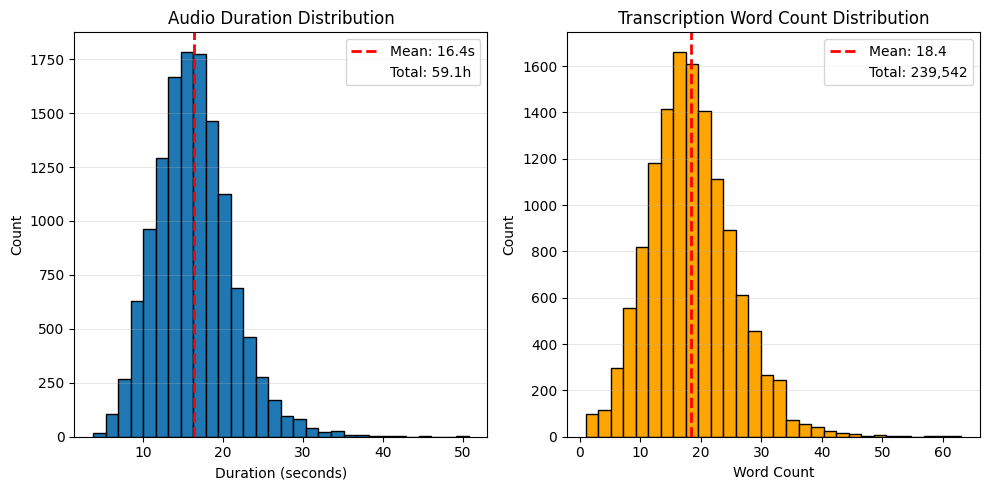

type
train    52.092995
test      4.081874
dev       2.933133
Name: duration, dtype: float64

In [4]:
from scripts.dataset_plotting import plot_distribution_graphs

plot_distribution_graphs(all_data_df)
total_duration = all_data_df.groupby("type")["duration"].sum() / 3600
total_duration.sort_values(ascending=False)

### Extract random samples

In [5]:
from sklearn.model_selection import train_test_split

duration_mask = (all_data_df["duration"] >= 3) & (all_data_df["duration"] <= 30)
news_part_in_train_set_mask = all_data_df["path"].str.startswith("train/10")
book_part_in_train_set_mask = all_data_df["path"].str.startswith("train/0")

# Train set based on news
sampled_df = all_data_df[duration_mask & news_part_in_train_set_mask].sample(1700, random_state=SEED)
# Validation and test sets based on the book
test_validation_set = all_data_df[duration_mask & book_part_in_train_set_mask].sample(700, random_state=SEED)
val_df, test_df = train_test_split(test_validation_set, test_size=0.5, random_state=SEED)

# Label the subsets
val_df = val_df.assign(type="validation")
test_df = test_df.assign(type="test")

sampled_df = pd.concat([sampled_df, val_df, test_df])

sampled_df.to_csv(SAMPLED_DATA_PATH, index_label="id")
(sampled_df.groupby("type")["duration"].sum() / 3600).sort_values(ascending=False)

type
train         7.529329
validation    1.603526
test          1.581586
Name: duration, dtype: float64

### Extract audios from parquet files to manually check the quality of the overall dataset 

In [6]:
import scripts.audio_preprocessing as ap
from pathlib import Path

sampled_df = pd.read_csv(SAMPLED_DATA_PATH, index_col="id")

# Extract sampled audios from nested directories
sampled_paths = set(sampled_df["path"].tolist())
print(f"Need to extract {len(sampled_paths)} audio files")

# Create directory for extracted audio
os.makedirs(SAMPLED_AUDIO_DIR, exist_ok=True)

stats = []
for audio_path in tqdm(sampled_paths, desc="Processing files"):
    full_audio_path = os.path.join(DATASET_DIR, audio_path)
    path_to_save = os.path.join(SAMPLED_AUDIO_DIR, Path(audio_path).name)

    waveform, stat = ap.process_audio_file(
        full_audio_path,
        save_path=path_to_save,
        normalize=True,
        target_rms_db=-23.0,
        apply_highpass=True,
        highpass_cutoff=80.0,
        remove_silences=True,
        silence_threshold_db=-45.0,
        min_silence_duration=1.3,
    )
    stat["path"] = audio_path
    stats.append(stat)

processed_audio_stats_df = pd.DataFrame(stats)
processed_audio_stats_df.to_csv(PROCESSED_AUDIO_STATS_PATH, index=False)

print(f"\nExtracted and normalized {len(sampled_paths)} audio files to {SAMPLED_AUDIO_DIR}")
processed_audio_stats_df

Need to extract 2400 audio files


Processing files: 100%|██████████| 2400/2400 [01:08<00:00, 35.10it/s]


Extracted and normalized 2400 audio files to ../datasets/feruza-speech/sampled_audio


,input_audio_filename,original_rms_db,final_rms_db,original_duration,final_duration,reduced_duration,peak_amplitude,is_clipped,path
0,1024-63.wav,-9.3723,-23.0772,26.397750,23.767750,2.6300,0.1993,False,train/1024/1024-63.wav
1,043-23.wav,-14.9966,-23.1318,14.839313,14.839313,0.0000,0.3786,False,train/043/043-23.wav
2,023-28.wav,-24.8861,-23.1496,15.195187,13.230000,1.9652,0.5832,False,train/023/023-28.wav
3,002-08.wav,-31.2552,-23.1882,11.480000,10.490000,0.9900,0.5886,False,train/002/002-08.wav
4,1056-08.wav,-10.9092,-23.0985,14.636250,13.756250,0.8800,0.2397,False,train/1056/1056-08.wav
...,...,...,...,...,...,...,...,...,...
2395,1053-57.wav,-13.2301,-23.1013,14.035312,11.495313,2.5400,0.2866,False,train/1053/1053-57.wav
2396,1002-62.wav,-13.4935,-23.1013,20.071938,20.071938,0.0000,0.3235,False,train/1002/1002-62.wav
2397,1023-92.wav,-9.0161,-23.0715,18.156125,15.086125,3.0700,0.1860,False,train/1023/1023-92.wav
2398,035-58.wav,-20.5559,-23.3706,7.884563,7.884563,0.0000,0.6342,False,train/035/035-58.wav


In [7]:
processed_audio_stats_df.describe()

,original_rms_db,final_rms_db,original_duration,final_duration,reduced_duration,peak_amplitude
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,-15.056391,-23.123221,16.071655,14.981613,1.090042,0.358868
std,6.033925,0.043816,4.498346,4.549008,1.042301,0.156223
min,-33.274500,-23.409700,5.021000,2.414438,0.000000,0.148700
25%,-16.694500,-23.147000,12.954359,11.802687,0.000000,0.225350
50%,-14.051500,-23.116350,15.838188,14.667000,1.060000,0.333200
75%,-10.443825,-23.090000,18.823859,17.819938,2.040000,0.432650
max,-5.996300,-23.052400,29.808625,29.808625,4.527400,0.836900


In [8]:
sampled_df = pd.read_csv(SAMPLED_DATA_PATH, index_col="id")
processed_audio_stats_df = pd.read_csv(PROCESSED_AUDIO_STATS_PATH)

old_total_duration = sampled_df["duration"].sum() / 3600
old_duration_mean = sampled_df["duration"].mean()

# --- Replace sampled_df.duration using processed_audio_stats_df.final_duration ---

# Merge final_duration into the sampled dataframe
sampled_df = sampled_df.merge(
    processed_audio_stats_df[["path", "input_audio_filename", "final_duration"]],
    how="left",
    left_on="path",
    right_on="path"
)

# Replace duration only where we have final_duration
sampled_df["duration"] = (
    sampled_df["final_duration"].combine_first(sampled_df["duration"])
)

# Keep only file name as a path
sampled_df.drop(columns=["path"], inplace=True)
sampled_df.rename(columns={"input_audio_filename": "path"}, inplace=True)

# Drop helper columns
sampled_df = sampled_df.drop(columns=["final_duration"])

# Reorder path column to be the second
cols = list(sampled_df.columns)
cols.remove("path")
cols.insert(1, "path")
sampled_df = sampled_df[cols]

# --- Remove suspiciously short and short recordings  ---

# Remove very short audios
mask_short_audio = (processed_audio_stats_df["final_duration"] < 3)
paths_to_remove = processed_audio_stats_df.loc[mask_short_audio, "input_audio_filename"].tolist()

total_reduced_duration = processed_audio_stats_df["reduced_duration"].sum() / 3600

# Remove these rows from processed stats
processed_audio_stats_df = processed_audio_stats_df[
    ~processed_audio_stats_df["input_audio_filename"].isin(paths_to_remove)
]

# Remove these recordings entirely
sampled_df = sampled_df[
    ~sampled_df["path"].isin(paths_to_remove)
]
print(f"{len(paths_to_remove)} recordings are removed from the sample")

# Updated totals
current_total_duration = processed_audio_stats_df["final_duration"].sum() / 3600
current_duration_mean = processed_audio_stats_df["final_duration"].mean()

# Save updated CSVs
processed_audio_stats_df.to_csv(PROCESSED_AUDIO_STATS_PATH)
sampled_df.to_csv(SAMPLED_DATA_PATH, index_label="id")

print(
    f"Before audio preprocessing: total duration - {old_total_duration:,.3f} h | mean {old_duration_mean:,.1f} s"
)
print(
    f"After audio preprocessing: total duration - {current_total_duration:,.3f} h "
    f"(reduced {total_reduced_duration * 60:.0f} min) | mean {current_duration_mean:,.1f} s"
)

sampled_df

2 recordings are removed from the sample
Before audio preprocessing: total duration - 10.714 h | mean 16.1 s
After audio preprocessing: total duration - 9.986 h (reduced 44 min) | mean 15.0 s


,type,path,text_latin,text_cyrillic,duration,word_count
0,train,1002-56.wav,O‘zbekiston nima qila oladi? - Global koronavi...,Ўзбекистон нима қила олади? - Глобал коронавир...,14.309437,17
1,train,1002-65.wav,"Xabarlarga ko‘ra, Tolibonning ikki taniqli eta...","Хабарларга кўра, Толибоннинг икки таниқли етак...",22.920063,26
2,train,1056-07.wav,Xitoydan tarqalgan koronavirus 4 mart sanasiga...,Хитойдан тарқалган коронавирус 4 март санасига...,19.010875,20
3,train,1033-68.wav,"Bugun Belarus poytaxtida ""normandiya to‘rtligi...","Бугун Беларус пойтахтида ""нормандия тўртлиги"" ...",16.309313,18
4,train,1001-38.wav,"Birmada xalqaro ""Chegara bilmas shifokorlar"" x...","Бирмада халқаро ""Чегара билмас шифокорлар"" хай...",10.137625,11
...,...,...,...,...,...,...
2395,test,010-24.wav,"— Bu qanday tentaklik? — Ha, men u bolani shu ...","— Бу қандай тентаклик? — Ҳа, мен у болани шу қ...",7.950563,13
2396,test,011-59.wav,O‘sha kuni kechasi juda yomon bezovta bo‘lib c...,Ўша куни кечаси жуда ёмон безовта бўлиб чиқдим...,17.424312,24
2397,test,024-68.wav,"U erda nima qilganini, nega yig‘laganii ayttir...","У ерда нима қилганини, нега йиғлагании айттири...",16.190000,26
2398,test,042-24.wav,"— Kelinoyim, yangi kuyovning kitob o‘qib o‘tir...","— Келинойим, янги куёвнинг китоб ўқиб ўтириши ...",18.416062,25


In [12]:
# Before running set your own PROJECT_ID to .env file (e.g. GOOGLE_CLOUD_PROJECT="your id here")
from pathlib import Path
from scripts import google_transcribe

# Prepare audio paths
sampled_df = pd.read_csv(SAMPLED_DATA_PATH, index_col="id")
audio_paths = sampled_df["path"].apply(lambda file_name: os.path.join(SAMPLED_AUDIO_DIR, file_name)).tolist()

# Process files in parallel using two regions
print(f"Processing {len(audio_paths)} audio files using 2 regions (eu, us)...")
print("Starting parallel transcription...\n")

try:
    results = google_transcribe.transcribe_batch_parallel(
        audio_paths=audio_paths,
        regions=["eu", "us"],
        max_workers=12
    )
except Exception as err:
    print(f"\nCritical error during parallel processing: {type(err).__name__}: {err}")
    raise

# Process results
predicted_transcriptions = []
failed_count = 0
success_count = 0

for result in results:
    transcription_entry = {
        "path": Path(result["path"]).name,
        "predicted_sentence": result["predicted_sentence"],
        "error_message": result["error_message"],
        "error_type": result["error_type"],
    }

    predicted_transcriptions.append(transcription_entry)

    if result["predicted_sentence"] is not None:
        success_count += 1
    else:
        failed_count += 1

# Save results
predicted_transcripts_df = pd.DataFrame(predicted_transcriptions)
predicted_transcripts_df.to_csv(TRANSCRIPTION_RESULTS_PATH, index_label="id")
print(f"\nSaved transcription results to: {TRANSCRIPTION_RESULTS_PATH}")

print(f"\n{'=' * 60}")
print(f"Transcription Complete!")
print(f"{'=' * 60}")
print(f"✓ Successfully transcribed: {success_count}")
print(f"✗ Failed: {failed_count}")
print(f"Success rate: {success_count / len(sampled_df) * 100:.2f}%")

predicted_transcripts_df

Processing 2398 audio files using 2 regions (eu, us)...
Starting parallel transcription...



Transcribing: 100%|██████████| 2398/2398 [15:01<00:00,  2.66file/s]


Saved transcription results to: ../datasets/feruza-speech/google_spt_transcriptions.csv

Transcription Complete!
✓ Successfully transcribed: 2398
✗ Failed: 0
Success rate: 100.00%


,path,predicted_sentence,error_message,error_type
0,1036-12.wav,21 yildan buyon qamoqda saqlanayotgan Murod Jo...,None,None
1,1001-38.wav,"Birmada, Xalqaro ""Chegara bilmas shifokorlar"" ...",None,None
2,1002-56.wav,O'zbekiston nima qila oladi? Global koronaviru...,None,None
3,1054-101.wav,"Bir oydirki, O'zbekistonda Facebook va YouTube...",None,None
4,1066-84.wav,"Kaliforniyalik Ketti Marreyga ko'ra, u eri bil...",None,None
...,...,...,...,...
2393,011-59.wav,O'sha kuni kechasi juda yomon bezovta bo'lib c...,None,None
2394,028-64.wav,"Jon Naziha, mening o'rnimga sen bor, bugun kel...",None,None
2395,024-68.wav,"U yerda nima qilganini, nega yig'laganini ayti...",None,None
2396,036-73.wav,Bitta kampir qo'shnimiz bor edi. Shundan Munis...,None,None


In [ ]:
from scripts import similarity_metrics
import scripts.uzbek_transliterator as uzbek_transliterator
from scripts.similarity_metrics import NormalizationLevel

sampled_df = pd.read_csv(SAMPLED_DATA_PATH, index_col="id")

sampled_df.drop(columns=["error_message", "error_type"], inplace=True, errors="ignore")
sampled_df.rename(columns={"text_latin": "text_latin_original"}, inplace=True)

# Apply custom Uzbek Cyrillic to Latin script
latin_texts = sampled_df.apply(
    lambda row: uzbek_transliterator.to_latin(
        row["text_cyrillic"],
        normalize_apostrophes=True
    ),
    axis=1
)
latin_texts.name = "text_latin"
sampled_df: pd.DataFrame = pd.concat([sampled_df, latin_texts], axis=1)

# Apply similarity metrics to both Latin texts
compare_latin_texts = sampled_df.apply(
    lambda row: similarity_metrics.calculate(
        reference=row["text_latin"],  # custom transliterated
        hypothesis=normalize_uzbek_apostrophes(row["text_latin_original"]),  # original Latin transliterated
        normalization_level=NormalizationLevel.NONE,  # plain Latin texts
    ),
    axis=1
)
# Convert list of dicts → DataFrame
compare_latin_df = pd.DataFrame(compare_latin_texts.tolist())
print(f"Found {len(compare_latin_df[compare_latin_df["wer"] > 0])} mismatches")
compare_latin_df.sort_values("wer", ascending=False)

In [ ]:
predicted_transcripts_df = pd.read_csv(TRANSCRIPTION_RESULTS_PATH, index_col="id")

# Merge transcription results with original data
sampled_df = sampled_df.merge(
    predicted_transcripts_df,
    left_on="path",
    right_on="path",
    how="left"
)

# Original transliterated Latin text is garbage
sampled_df.drop(columns=["text_latin_original"], inplace=True, errors="ignore")
sampled_df.rename(columns={"predicted_sentence": "text_spt"}, inplace=True)

# Apply similarity metrics to each row
metrics = sampled_df.apply(
    lambda row: similarity_metrics.calculate(
        reference=row["text_latin"],  # custom Latin transliterated
        hypothesis=row["text_spt"],  # Google SPT generated text
    ),
    axis=1
)

# Convert list of dicts → DataFrame
metrics_df = pd.DataFrame(metrics.tolist())

# Merge metric columns back into main DataFrame and save
sampled_df = pd.concat([sampled_df, metrics_df], axis=1)

# Reorder columns
cols = ["path", "type", "duration", "text_cyrillic", "text_latin", "text_spt", "ref_normalized", "hyp_normalized",
        "wer", "cer", "sequence_similarity", "ref_word_count", "hyp_word_count", "word_count"]
sampled_df = sampled_df[cols]

sampled_df.to_csv(SAMPLED_DATA_PATH, index_label="id")
sampled_df.sort_values("wer", ascending=False)

In [ ]:
aligned_mask = sampled_df["wer"] == 0.0

total_recordings = len(sampled_df)
not_aligned_duration = sampled_df[~aligned_mask]["duration"].sum() / 3600

len_aligned_recordings = len(sampled_df[aligned_mask])
aligned_duration = sampled_df[aligned_mask]["duration"].sum() / 3600

print(f"Total duration of the sample: {sampled_df["duration"].sum() / 3600:.2f} hours")
print(
    f"Audio and transcription aligned recordings: {len_aligned_recordings:,} - {aligned_duration:.2f} hours")
print(
    f"Remaining recordings: {total_recordings - len_aligned_recordings:,} - {not_aligned_duration:.2f} hours")

print("\nFinal sample after removing mis-aligned recordings:")

# Remove poor alignment (wer > 0%)
sampled_df = sampled_df[aligned_mask]

sampled_df.to_csv(SAMPLED_DATA_PATH, index_label="id")
print((sampled_df.groupby("type")["duration"].sum() / 3600).sort_values(ascending=False))
sampled_df.describe()

In [16]:
import glob

sampled_df = pd.read_csv(SAMPLED_DATA_PATH, index_col="id")

all_audio_paths = set(glob.glob(os.path.join(SAMPLED_AUDIO_DIR, "*.wav")))
audio_paths_to_keep = set(
    sampled_df["path"]
    .apply(lambda file_name: os.path.join(SAMPLED_AUDIO_DIR, file_name))
)
audio_paths_to_remove = all_audio_paths - audio_paths_to_keep

for path in audio_paths_to_remove:
    os.remove(path)

print(f"Removed unnecessary {len(audio_paths_to_remove):,} audio files")

Removed unnecessary 1,256 audio files


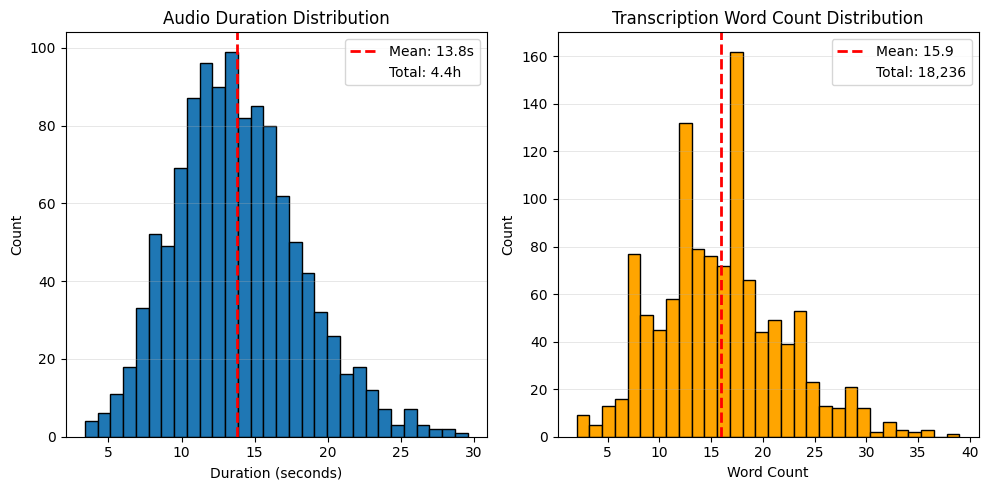

type
train         3.568746
validation    0.425895
test          0.399899
Name: duration, dtype: float64

In [2]:
from scripts.dataset_plotting import plot_distribution_graphs

sampled_df = pd.read_csv(SAMPLED_DATA_PATH, index_col="id")

plot_distribution_graphs(sampled_df)
duration_by_type = sampled_df.groupby("type")["duration"].sum() / 3600
duration_by_type.sort_values(ascending=False)